<a href="https://colab.research.google.com/github/AnkurSaha45/Vehicle-Price-Prediction/blob/main/Vehicle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [ ]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload dataset.csv here

df = pd.read_csv('dataset.csv')
df.head()


Saving dataset.csv to dataset (1).csv


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop irrelevant or text-heavy columns
df.drop(['name', 'description', 'engine', 'trim', 'interior_color', 'exterior_color'], axis=1, inplace=True)

# Drop rows with missing values (or you can fill them)
df.dropna(inplace=True)


In [ ]:
# Use LabelEncoder for simplicity (OneHotEncoding is also valid)
le = LabelEncoder()
for col in ['make', 'model', 'fuel', 'transmission', 'body', 'drivetrain']:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Define X and y
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
# Linear Regression Evaluation
print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

# Random Forest Evaluation
print("\nRandom Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Linear Regression:
RMSE: 13999.906602478504
R² Score: 0.21686853902996872

Random Forest:
RMSE: 9064.491192999969
R² Score: 0.6716997168555265


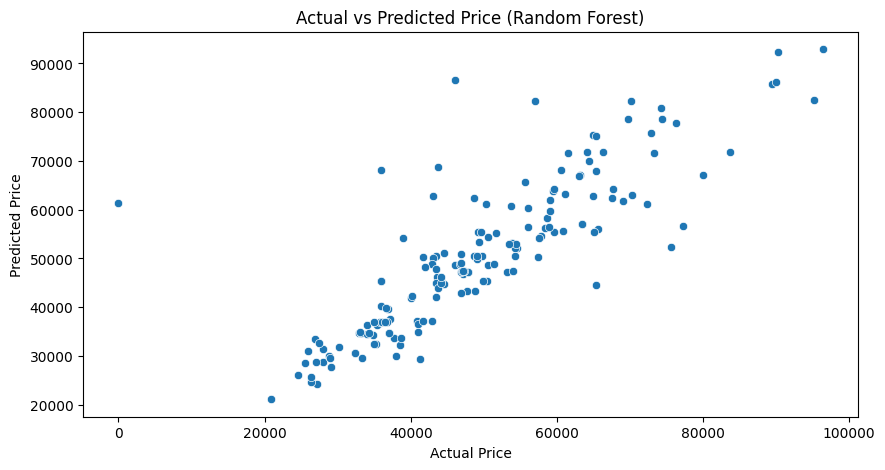

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.show()
